
# Pandas and Visualization Homework with IMDb data



### Part 1

- read in 'imdb_1000.csv' and store it in a DataFrame named movies
- check the number of rows and columns
- check the data type of each column
- calculate the average movie duration
- sort the DataFrame by duration to find the shortest and longest movies
- create a histogram of duration
- use a box plot to display that same data

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
filename = '/Users/anna/GA/DAT-DC-10/data/imdb_1000.csv'
imdb = pd.read_csv(filename, sep=',', header=0, na_filter=False)

In [118]:
# check the number of rows and columns
imdb.shape

(979, 6)

In [119]:
# check the data type of each column
dt_list = [(col, type(imdb.loc[0, col])) for col in imdb.columns ]
dt_list

[('star_rating', numpy.float64),
 ('title', str),
 ('content_rating', str),
 ('genre', str),
 ('duration', numpy.int64),
 ('actors_list', str)]

In [120]:
# calculate the average movie duration
imdb.duration.mean()

120.97957099080695

In [121]:
# sort the DataFrame by duration to find the shortest and longest movies
imdb.duration.describe() # max = 242, min=64
l = imdb.duration.sort_values()
print l.head(1)
print l.tail(1)
# print l

389    64
Name: duration, dtype: int64
476    242
Name: duration, dtype: int64


(array([  1.,   2.,   3.,   1.,   0.,   0.,   3.,   3.,   7.,   5.,   7.,
         12.,   9.,  11.,  15.,  20.,  28.,  23.,  10.,  33.,  37.,  33.,
         16.,  32.,  31.,  32.,  36.,  22.,  31.,  31.,  31.,  18.,  33.,
         29.,  32.,  28.,  19.,  31.,  18.,  20.,  10.,  21.,  15.,  13.,
         17.,   3.,  13.,   5.,   8.,   6.,  11.,   7.,  11.,   5.,   3.,
          7.,   8.,   4.,   4.,   6.,   4.,   2.,   3.,   1.,   6.,   4.,
          2.,   1.,   1.,   3.,   3.,   2.,   1.,   2.,   2.,   0.,   2.,
          1.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([  64.  ,   65.78,   67.56,   69.34,   71.12,   72.9 ,   74.68,
          76.46,   78.24,   80.02,   81.8 ,   83.58,   85.36,   87.14,
          88.92,   90.7 ,   92.48,   94.26,   96.04,   97.82,   99.6 ,
         101.38,  103.16,  104.94,  106.72,  108.5 ,  110.28,  112.06,
         113.84,  115.62,  117.4 ,

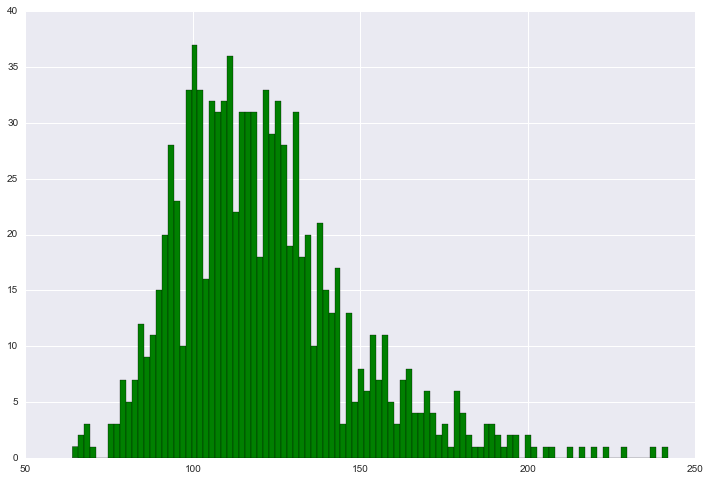

In [122]:
# create a histogram of duration
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14
plt.hist(imdb.duration, bins=100, facecolor='green')

{'boxes': [<matplotlib.lines.Line2D at 0x120d8c890>],
 'caps': [<matplotlib.lines.Line2D at 0x121e30610>,
 'fliers': [<matplotlib.lines.Line2D at 0x121e39910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x121e392d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x121e208d0>,
  <matplotlib.lines.Line2D at 0x121e20f90>]}

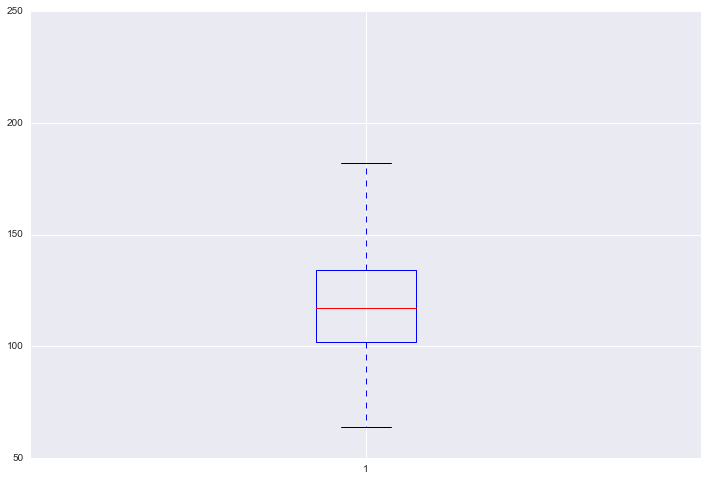

In [123]:
# use a box plot to display that same data
plt.boxplot(imdb.duration)


### Part 2

- count how many movies have each of the content ratings
- use a visualization to display that same data, including a title and x and y labels
- convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
- convert the following content ratings to "NC-17": X, TV-MA
- count the number of missing values in each column
- if there are missing values: examine them, then fill them in with "reasonable" values
- calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours
- use a visualization to detect whether there is a relationship between duration and star rating
- calculate the average duration for each genre

In [124]:
# count how many movies have each of the content ratings
imdb.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
               3
TV-MA          1
Name: content_rating, dtype: int64

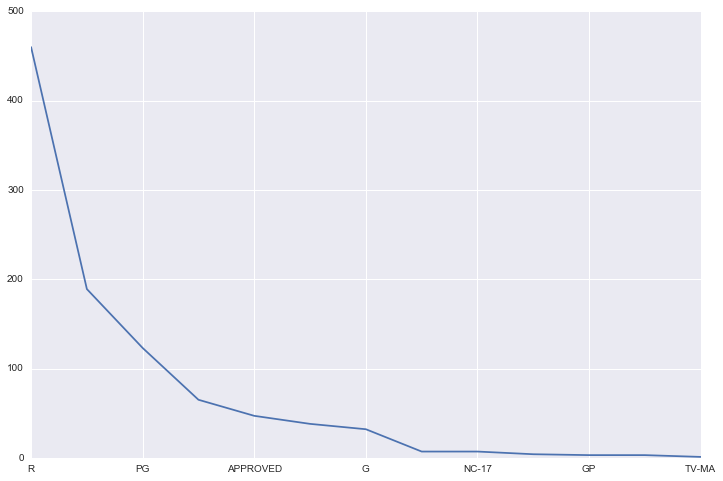

In [125]:
# use a visualization to display that same data, including a title and x and y labels
imdb.content_rating.value_counts().plot()

In [126]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
# convert the following content ratings to "NC-17": X, TV-MA
# lambda example: map(lambda word: len(word), words)

imdb["unrated"] = map(lambda r: "UNRATED" if r in ["NOT RATED", "APPROVED", "PASSED", "GP"] else r, imdb.content_rating)
print imdb.content_rating.value_counts()
print imdb.unrated.value_counts()
imdb.unrated.value_counts()
imdb["unr_ma"] = map(lambda r: "NC-17" if r in ["X", "TV-MA"] else r, imdb.unrated)
print imdb.unr_ma.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
               3
TV-MA          1
Name: content_rating, dtype: int64
R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
             3
TV-MA        1
Name: unrated, dtype: int64
R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
             3
Name: unr_ma, dtype: int64


In [127]:
# count the number of missing values in each column
print "Number of null content_ratings:", len(imdb[imdb.content_rating == ''])
print "Titles with missing content_ratings:", imdb[imdb.content_rating == ''].title

Number of null content_ratings: 3
Titles with missing content_ratings: 187    Butch Cassidy and the Sundance Kid
649                     Where Eagles Dare
936                             True Grit
Name: title, dtype: object


In [128]:
# if there are missing values: examine them, then fill them in with "reasonable" values
imdb["unr_ma"] = map(lambda r: "UNRATED" if r == '' else r, imdb.unr_ma)
# check results:
imdb.unr_ma.value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: unr_ma, dtype: int64

In [129]:
# calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours
print "Star rating for movies > 2h : ", imdb[imdb.duration > 120].star_rating.mean()
print "Star rating for movies <= 2h : ", imdb[imdb.duration <= 120].star_rating.mean()

Star rating for movies > 2h :  7.95366972477
Star rating for movies <= 2h :  7.83848987109


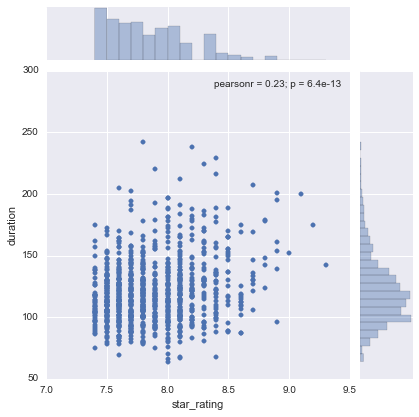

In [130]:
# use a visualization to detect whether there is a relationship between duration and star rating

sns.jointplot('star_rating', 'duration', data=imdb)

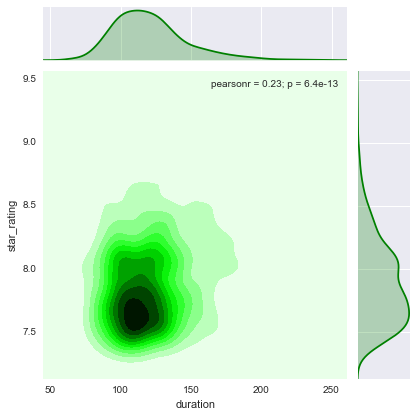

In [131]:
sns.jointplot('duration', 'star_rating', data=imdb, kind="kde", color='green')

The first scatterplot gives some indication that aboe 2 hour duration, the ratings seem to vary more widely compared to one closer to a bit less than 120.

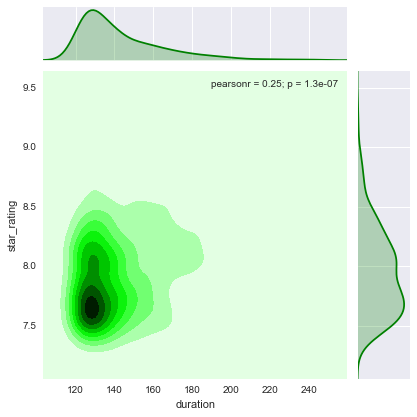

In [132]:
# use a visualization to detect whether there is a relationship between duration and star rating
# take a closer look when duration > 120
imdb_gt_120 = imdb[imdb.duration>120]
sns.jointplot('duration', 'star_rating', data=imdb_gt_120, kind="kde", color='green')

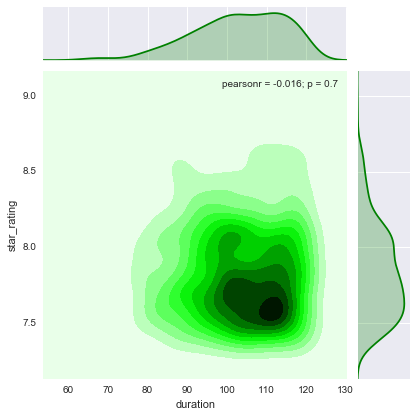

In [133]:
# take a closer look when duration <= 120
imdb_gt_120 = imdb[imdb.duration<=120]
sns.jointplot('duration', 'star_rating', data=imdb_gt_120, kind="kde", color='green')

The observation from these plots is that movies that are ~100-120 minutes in length tend to get rated around 7.5 or so.  Pearson's R says there is no linear relationship between the two parameters.
* Question:  How do I get the darkest green values?
* How do I get the probability of residing within the various gradations of dark green.  
* I would want to know the x and y boundaries, and the probability of falling within the region.
* I couldn't get the Seaborn plots to expand larger - how?  Shouldn't the matplotlib.rcparams set earlier do this?

In [134]:
# calculate the average duration for each genre
imdb.groupby("genre").duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

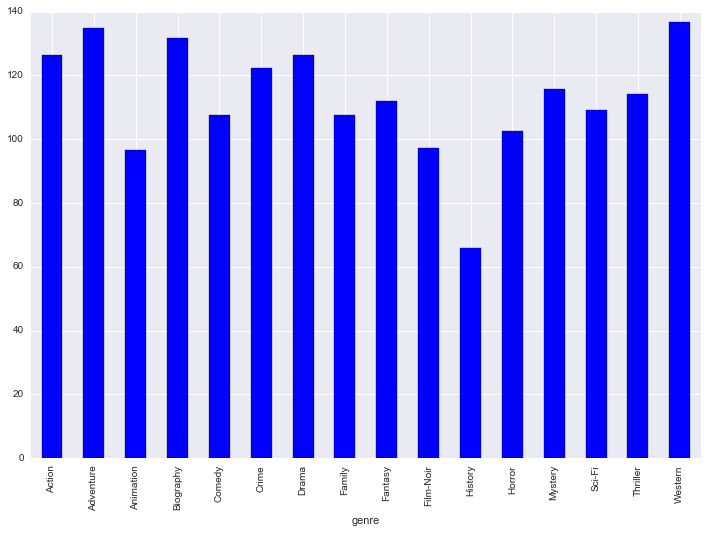

In [135]:
imdb.groupby("genre").duration.mean().plot(kind="bar")

### Part 3

- visualize the relationship between content rating and duration
- determine the top rated movie (by star rating) for each genre
- check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
- calculate the average star rating for each genre, but only include genres with at least 10 movies


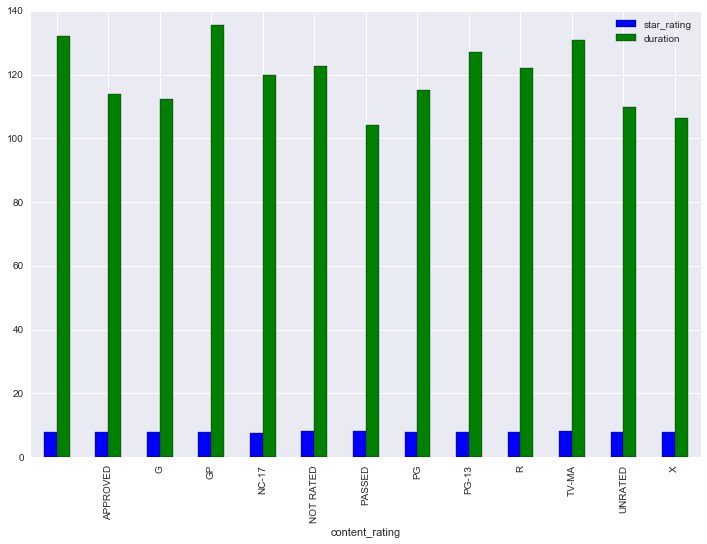

In [136]:
# visualize the relationship between content rating and duration
imdb.groupby('content_rating').mean().plot(kind='bar')

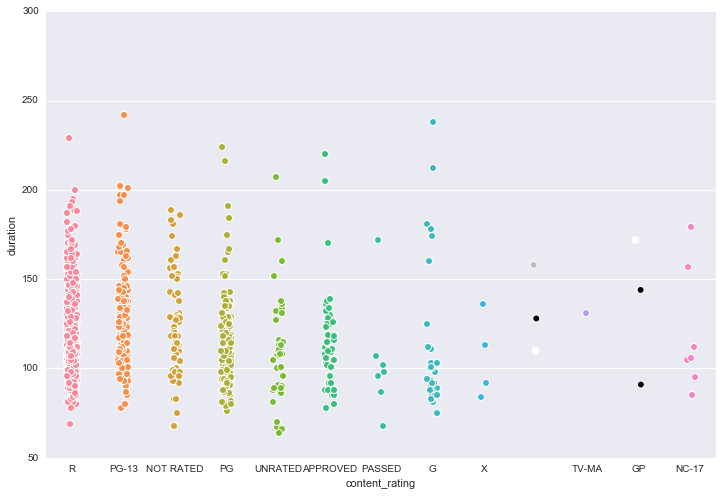

In [137]:
sns.stripplot(x='content_rating', y='duration', data=imdb, jitter=True)

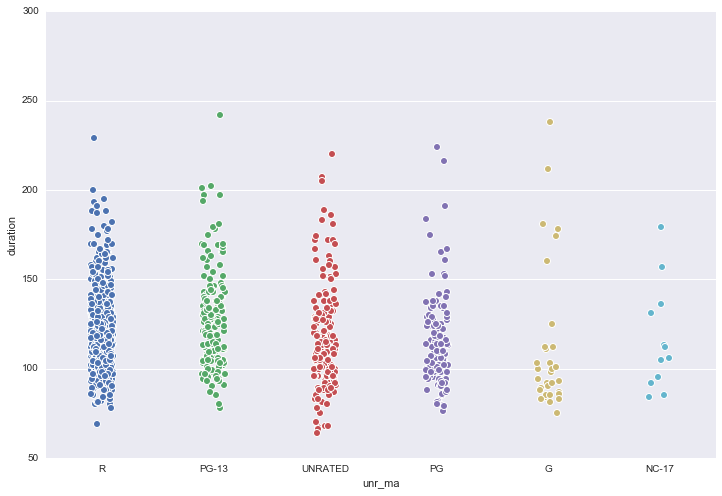

In [138]:
sns.stripplot(x='unr_ma', y='duration', data=imdb, jitter=True)

Strip plot to see what the individual points look like per movie rating.  This makes me want to see the distribution.

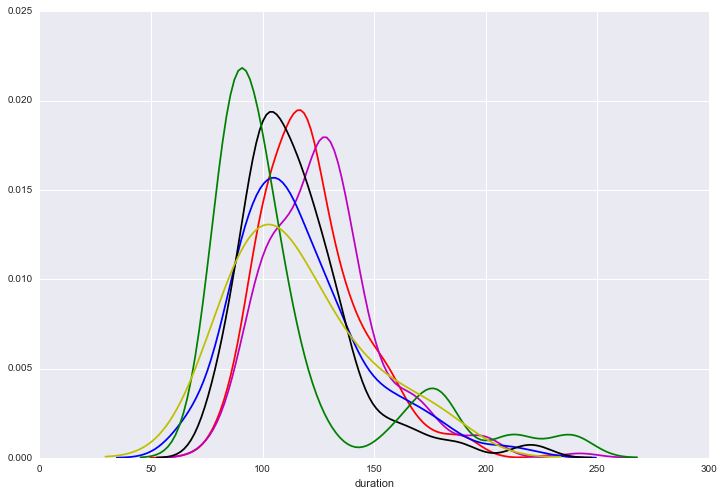

In [139]:
data_R = imdb[imdb.unr_ma == 'R']
sns.distplot(data_R.duration, rug=False, bins = 20, hist=False, color = 'r')

data_PG13 = imdb[imdb.unr_ma == 'PG-13']
sns.distplot(data_PG13.duration, rug=False, bins = 20, hist=False, color = 'm')

data_UNR = imdb[imdb.unr_ma == 'UNRATED']
sns.distplot(data_UNR.duration, rug=False, bins = 20, hist=False, color = 'b')

data_PG = imdb[imdb.unr_ma == 'PG']
sns.distplot(data_PG.duration, rug=False, bins = 20, hist=False, color = 'k')

data_G = imdb[imdb.unr_ma == 'G']
sns.distplot(data_G.duration, rug=False, bins = 20, hist=False, color = 'g')

data_NC = imdb[imdb.unr_ma == 'NC-17']
sns.distplot(data_NC.duration, rug=False, bins = 20, hist=False, color='y')


Trying to see the distributions of duration per content_rating.  
It's hard to see when it is overlapped like this. And I could not figure out how to label individual plots.

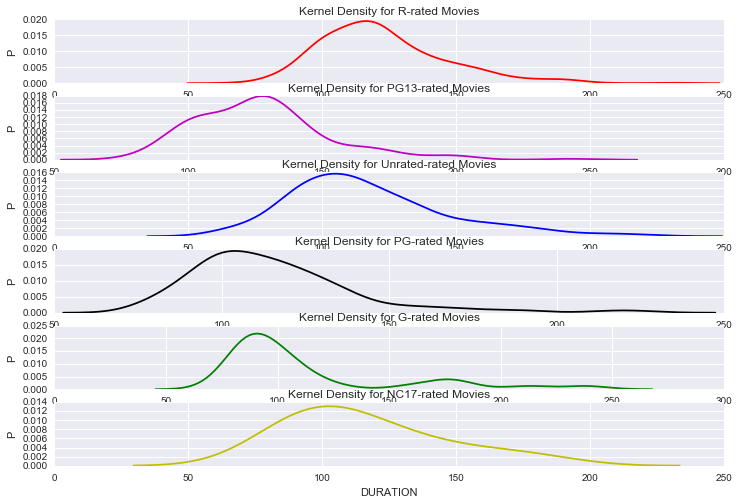

In [140]:
plt.subplot(6,1,1)
sns.distplot(data_R.duration, rug=False, bins = 20, hist=False, color = 'r')
plt.title('Kernel Density for R-rated Movies')
plt.ylabel('P')
plt.subplot(6,1,2)
sns.distplot(data_PG13.duration, rug=False, bins = 20, hist=False, color = 'm')
plt.title('Kernel Density for PG13-rated Movies')
plt.ylabel('P')
plt.subplot(6,1,3)
sns.distplot(data_UNR.duration, rug=False, bins = 20, hist=False, color = 'b')
plt.title('Kernel Density for Unrated-rated Movies')
plt.ylabel('P')
plt.subplot(6,1,4)
sns.distplot(data_PG.duration, rug=False, bins = 20, hist=False, color = 'k')
plt.title('Kernel Density for PG-rated Movies')
plt.ylabel('P')
plt.subplot(6,1,5)
sns.distplot(data_G.duration, rug=False, bins = 20, hist=False, color = 'g')
plt.title('Kernel Density for G-rated Movies')
plt.ylabel('P')
plt.subplot(6,1,6)
sns.distplot(data_NC.duration, rug=False, bins = 20, hist=False, color='y')
plt.title('Kernel Density for NC17-rated Movies')
plt.ylabel('P')
plt.xlabel("DURATION")

This is better, I can actually label, compare distributions.  The observation is that family friendly movies (G, PG, PG13) as compared to R and NC17 movies tend to be shorter in duration.  Makes sense, ie. children's shorter attention spans.  I did not do a scatterplot (x vs. y) because that did not seem to make sense in this context, as we did for scatterplot for something like star-rating and duration.

Question:  Are there other ways I should be looking at this dataset?

In [187]:
# determine the top rated movie (by star rating) for each genre
l = []
highest = imdb.groupby("genre").star_rating.max()
for i, v in highest.iteritems():
    df = imdb[(imdb.genre == i) & (imdb.star_rating == v)]
    l += [ (i, row['title'], v) for ind, row in df.iterrows() ]
        
l

[('Action', 'The Dark Knight', 9.0),
 ('Adventure',
  'The Lord of the Rings: The Return of the King',
  8.9000000000000004),
 ('Animation', 'Spirited Away', 8.5999999999999996),
 ('Biography', "Schindler's List", 8.9000000000000004),
 ('Comedy', 'Life Is Beautiful', 8.5999999999999996),
 ('Comedy', 'City Lights', 8.5999999999999996),
 ('Comedy', 'Modern Times', 8.5999999999999996),
 ('Crime', 'The Shawshank Redemption', 9.3000000000000007),
 ('Drama', '12 Angry Men', 8.9000000000000004),
 ('Drama', 'Fight Club', 8.9000000000000004),
 ('Family', 'E.T. the Extra-Terrestrial', 7.9000000000000004),
 ('Fantasy', 'The City of Lost Children', 7.7000000000000002),
 ('Film-Noir', 'The Third Man', 8.3000000000000007),
 ('History', 'Battleship Potemkin', 8.0),
 ('Horror', 'Psycho', 8.5999999999999996),
 ('Mystery', 'Rear Window', 8.5999999999999996),
 ('Sci-Fi', 'Blade Runner', 8.1999999999999993),
 ('Thriller', 'Shadow of a Doubt', 8.0),
 ('Western', 'The Good, the Bad and the Ugly', 8.90000000

In [186]:
df = pd.DataFrame(l)
df

,0,1,2
0,Action,The Dark Knight,9.0
1,Adventure,The Lord of the Rings: The Return of the King,8.9
2,Animation,Spirited Away,8.6
3,Biography,Schindler's List,8.9
4,Comedy,Life Is Beautiful,8.6
5,Comedy,City Lights,8.6
6,Comedy,Modern Times,8.6
7,Crime,The Shawshank Redemption,9.3
8,Drama,12 Angry Men,8.9
9,Drama,Fight Club,8.9


In [217]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
bool_list = imdb.title.value_counts() > 1

# i am making the assumption that if the duration and the actors_list are different then the movies are not duplicates
double_titles = [i for i, v in bool_list.iteritems() if v == True]

not_dups = []
for t in double_titles:
    matches = imdb[imdb.title == double_titles[0]]
    # I am cheating here, there are only doubles, nothing more than that
    b = (matches.iloc[0] == matches.iloc[1])
    if len(b) != sum(b):
        not_dups.append(matches)
        # this is a list of DF's, not the best way to do this

In [227]:
for i in not_dups:
    print i

     star_rating                            title content_rating  genre  \
466          7.9  The Girl with the Dragon Tattoo              R  Crime   
482          7.8  The Girl with the Dragon Tattoo              R  Crime   

     duration                                        actors_list unrated  \
466       158  [u'Daniel Craig', u'Rooney Mara', u'Christophe...       R   
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...       R   

    unr_ma  
466      R  
482      R  
     star_rating                            title content_rating  genre  \
466          7.9  The Girl with the Dragon Tattoo              R  Crime   
482          7.8  The Girl with the Dragon Tattoo              R  Crime   

     duration                                        actors_list unrated  \
466       158  [u'Daniel Craig', u'Rooney Mara', u'Christophe...       R   
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...       R   

    unr_ma  
466      R  
482      R  
     star_ra

Note:  I need to get this into a pandas dataframe for better display in notebook.

In [238]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
genre_list = imdb.groupby('genre').genre.count()

In [241]:
genre_list

genre
Action       136
Adventure     75
Animation     62
Biography     77
Comedy       156
Crime        124
Drama        278
Family         2
Fantasy        1
Film-Noir      3
History        1
Horror        29
Mystery       16
Sci-Fi         5
Thriller       5
Western        9
Name: genre, dtype: int64

In [247]:
# genre_list is a Panda series of tuples i.e., (i[0], i[1])
genre_list = [i[0] for i in genre_list.iteritems() if i[1] > 10]

In [248]:
genre_list

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Horror',
 'Mystery']

In [258]:
# the 'in' python built-in did not work here
popular_genre_movies = imdb[imdb['genre'].isin(genre_list)]

In [260]:
popular_genre_movies.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

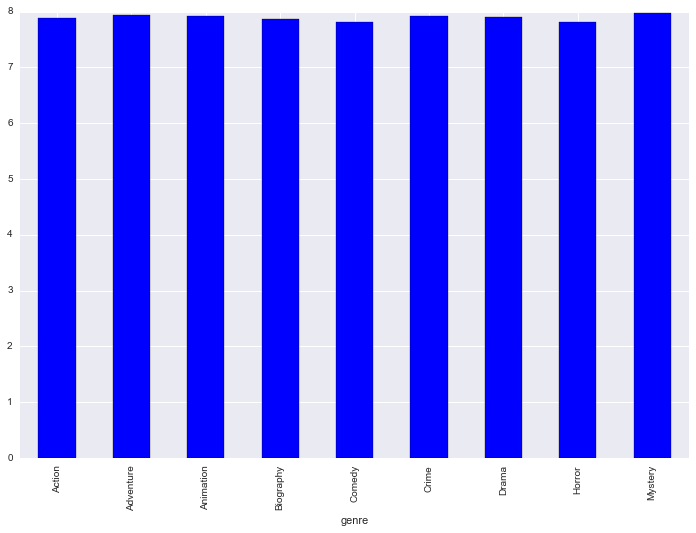

In [262]:
popular_genre_movies.groupby('genre').star_rating.mean().plot(kind='bar')

These are all very close, star rating does not distinguish across genre

In [347]:
# Figure out something "interesting" using the actors data!
from collections import defaultdict
d = defaultdict(int)

# This creates a nested dictionary of {actor: {genre_1: 1, genre_2: 1, genre_3: 1}}.  Not counts but genre variety
for k, v in imdb.iterrows():
    actors = v.actors_list.split(',')
    for actor in actors:
        actor = actor.strip('[').strip(']').strip ').strip("u'")
        if actor not in d.keys():
            d[actor] = {}
        d[actor][v.genre] = 1

In [351]:
#d

In [359]:
genres = defaultdict(int)
# flips dictionary around so that for # of genres, include the actor to list genre{1: ['Al Pacino', 'Meryl Streep'], ...}
for actor in d.keys():
    genres[len(d[actor])] += 1
genres

defaultdict(int, {1: 1365, 2: 265, 3: 97, 4: 32, 5: 12, 6: 3, 7: 2, 8: 1})

In [373]:
a = pd.DataFrame(genres.items(), columns = ['genres', 'actors'])
a.actors

0    1365
1     265
2      97
3      32
4      12
5       3
6       2
7       1
Name: actors, dtype: int64

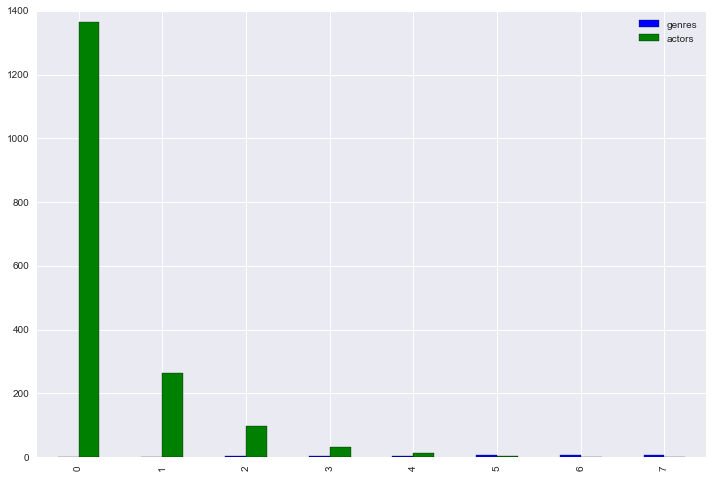

In [375]:
a.plot(kind = 'bar')

The observation here is that more than 91% of all actors only stay within 1 or 2 genres.
(1365+265) / float(len(d))

Question:  I could not get the x-axis to align with genres, instead it is using the index.

In [380]:
len(d)



1777